<a href="https://colab.research.google.com/github/likeshd/predictive_analysis/blob/main/Univariate_ts_forecasting_air_passanger_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


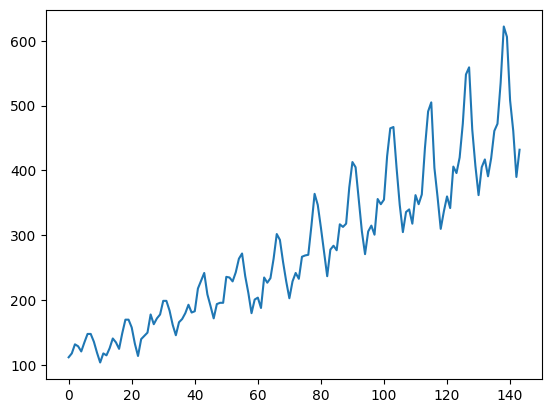

In [3]:
plt.plot(data.iloc[:, 1])

In [9]:
data.iloc[:,1:]

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(data.iloc[:,1:])


In [6]:
df.shape

(144, 1)

In [10]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [12]:
# splitting data into train and test
training_size = int(len(df)*0.65)
training_size

93

In [13]:
testing_size = len(df) - training_size
testing_size

51

In [20]:
train_data,test_data = df[0:training_size,:], df[training_size:len(df),:1]


In [21]:
train_data.shape, test_data.shape

((93, 1), (51, 1))

In [25]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]   ###i=0,
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [26]:
from datetime import time
#reshape into X=t and Y=t+1
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
X_train.shape, y_train.shape

((82, 10), (82,))

In [30]:
# reshape input to be [sample, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [31]:
X_train.shape, X_test.shape

((82, 10, 1), (40, 10, 1))

In [32]:
# create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=1, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0137 - val_loss: 0.0266
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - val_loss: 0.0671
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - val_loss: 0.0243
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - val_loss: 0.0363
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - val_loss: 0.0241
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0055 - val_loss: 0.0231
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0076 - val_loss: 0.0293
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0060 - val_loss: 0.0215
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0049 - val_loss: 0.0202
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - val_loss: 0.0199
Epoch 11/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - val_loss: 0.0219
Epoch 12/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss:

In [34]:
# lets do prediction and chk performance matrix
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [35]:
test_predict

array([[0.70607066],
       [0.69971675],
       [0.46594834],
       [0.45305657],
       [0.43915802],
       [0.44661254],
       [0.47194153],
       [0.56317234],
       [0.55681694],
       [0.40887815],
       [0.60551333],
       [0.7137135 ],
       [0.84305495],
       [0.85634667],
       [0.413427  ],
       [0.5130937 ],
       [0.43576998],
       [0.45111847],
       [0.47883958],
       [0.5832608 ],
       [0.649408  ],
       [0.48470205],
       [0.82875204],
       [0.76844156],
       [0.99397194],
       [0.7778644 ],
       [0.5065382 ],
       [0.50696963],
       [0.49466896],
       [0.5181358 ],
       [0.5168865 ],
       [0.6595991 ],
       [0.72308797],
       [0.7245018 ],
       [0.80099905],
       [1.0742269 ],
       [1.1124701 ],
       [0.83092415],
       [0.57335657],
       [0.52026284]], dtype=float32)

In [36]:
#Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
train_predict

array([[115.43091 ],
       [109.70903 ],
       [126.04965 ],
       [118.88646 ],
       [129.716   ],
       [139.33778 ],
       [135.02599 ],
       [127.27407 ],
       [149.90306 ],
       [162.50061 ],
       [156.07869 ],
       [144.64824 ],
       [120.61725 ],
       [115.926254],
       [147.24203 ],
       [143.3389  ],
       [151.80345 ],
       [178.54683 ],
       [161.96767 ],
       [179.44351 ],
       [171.31819 ],
       [185.58914 ],
       [175.53023 ],
       [165.29367 ],
       [151.06946 ],
       [152.69675 ],
       [179.45894 ],
       [174.71855 ],
       [186.85864 ],
       [196.63025 ],
       [187.07301 ],
       [193.0107  ],
       [222.02502 ],
       [214.54102 ],
       [228.31285 ],
       [180.2824  ],
       [178.59581 ],
       [176.64215 ],
       [213.89986 ],
       [203.74104 ],
       [212.84723 ],
       [243.26881 ],
       [237.57048 ],
       [246.64632 ],
       [244.05515 ],
       [248.75784 ],
       [247.27484 ],
       [210.4

In [38]:
test_predict

array([[469.74463],
       [466.45328],
       [345.36127],
       [338.68332],
       [331.48386],
       [335.3453 ],
       [348.46573],
       [395.7233 ],
       [392.43118],
       [315.7989 ],
       [417.6559 ],
       [473.7036 ],
       [540.70245],
       [547.5876 ],
       [318.15518],
       [369.78256],
       [329.72885],
       [337.67938],
       [352.0389 ],
       [406.1291 ],
       [440.39334],
       [355.07568],
       [533.2935 ],
       [502.05273],
       [618.87744],
       [506.93378],
       [366.3868 ],
       [366.6103 ],
       [360.23853],
       [372.39435],
       [371.7472 ],
       [445.67236],
       [478.55957],
       [479.29193],
       [518.9175 ],
       [660.4495 ],
       [680.2595 ],
       [534.4187 ],
       [400.99872],
       [373.49615]], dtype=float32)

In [39]:
# calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

230.22431873630103

In [40]:
math.sqrt(mean_squared_error(ytest, test_predict))

439.54824676579915

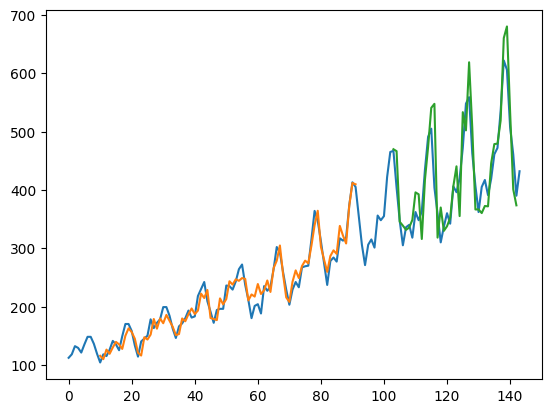

In [43]:
look_back = 10
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan

# Ensure the indices align with train_predict's shape
train_end = look_back + len(train_predict)
if train_end <= len(trainPredictPlot):
    trainPredictPlot[look_back:train_end, :] = train_predict
else:
    raise ValueError("train_predict is too large for the allocated space in trainPredictPlot.")

# Shift test prediction for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan

# Calculate the start and end indices for test prediction
test_start = len(train_predict) + (look_back * 2) + 1
test_end = test_start + len(test_predict)
if test_end <= len(testPredictPlot):
    testPredictPlot[test_start:test_end, :] = test_predict
else:
    raise ValueError("test_predict is too large for the allocated space in testPredictPlot.")

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
